# Introduction to Scientific Plotting with Jupyter

Interesting reads:

https://jupyter-notebook.readthedocs.io/en/stable/notebook.html

https://www.dataquest.io/blog/jupyter-notebook-tutorial/

## Basic Example

### Import Modules

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Basic Plots

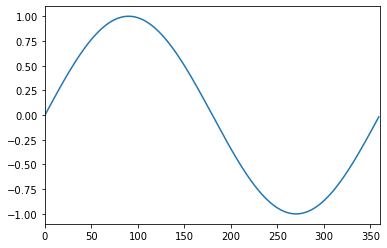

In [7]:
fs = 360
f = 2 
x = np.arange(fs) 
y = np.sin(1*np.pi*f * (x/fs)) 

plt.plot(x,y)
plt.xlim(0,360)
plt.show()

## Animated Sing Curve

<IPython.core.display.Javascript object>


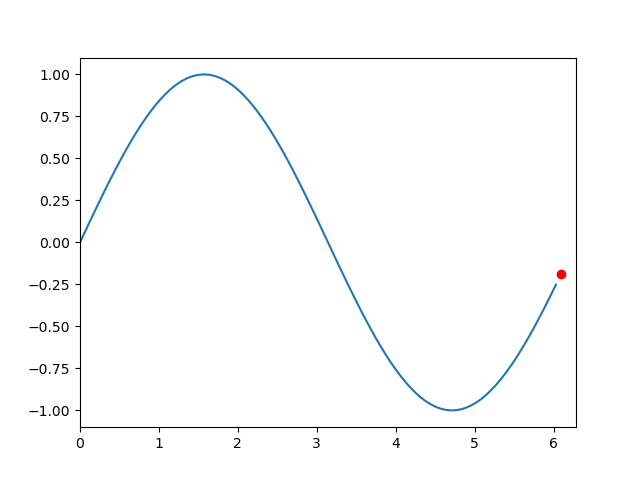

In [8]:
%matplotlib notebook

import matplotlib.animation as animation
from IPython.display import HTML

X = np.linspace(0, 2*np.pi, 100)
Y = np.sin(X)

fig, ax = plt.subplots(1,1)
ax.set_xlim([0, 2*np.pi])
ax.set_ylim([-1.1, 1.1])

sinegraph, = ax.plot([], [])
dot, = ax.plot([], [], 'o', color='red')

def sine(i):
    sinegraph.set_data(X[:i],Y[:i])
    dot.set_data(X[i],Y[i])


anim = animation.FuncAnimation(fig, sine, frames=len(X), interval=50)


## Embed an Image from URL

Image taken from DGFI's Website

![title](https://www.dgfi.tum.de/media/filer_public/45/ae/45ae4a11-912e-44d1-966c-ee786dc1402f/abs_2008_07_18.jpg)

## Embedding a Video

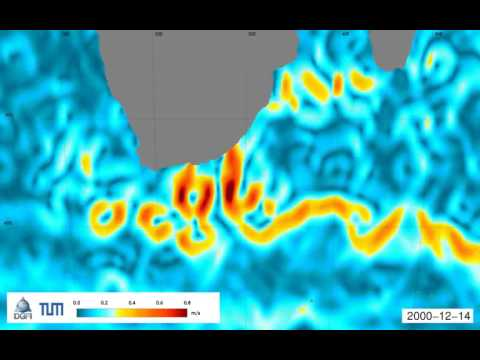

In [9]:
from IPython.display import YouTubeVideo
# Video taken from DGFI-TUM
YouTubeVideo('v_jPP-Tu45E')

## Example of GEBCO Bathymetry

### Import Modules

In [10]:
import cmocean as cmo
import xarray as xr
import pandas as pd



### Import GEBCO Data

In [11]:
bath = xr.open_dataset("GEBCO_2019.nc")

bathy = bath.sel(lat=slice(10,
                      12),
            lon=slice(141,143))

lon= bathy.lon
lat= bathy.lat
h  = bathy.elevation

Bathymetry in 3D

Traceback (most recent call last):
  File "/Users/hart-davis/miniconda3/envs/py3_parcels/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/Users/hart-davis/miniconda3/envs/py3_parcels/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


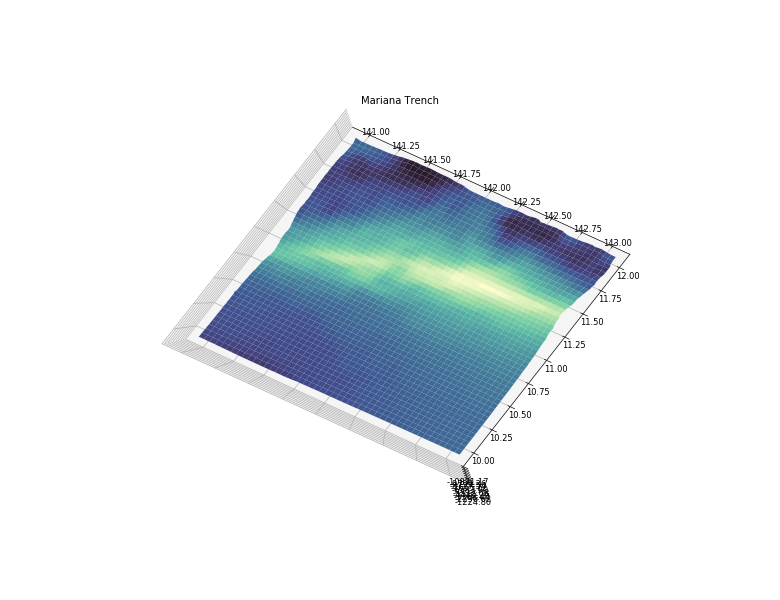

In [12]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(13, 10), dpi=60)

ax = fig.gca(projection='3d')
lons,lats = np.meshgrid(*(lon,lat))
surf = ax.plot_surface(lons,lats,h, cmap=cmo.cm.deep,
                       linewidth=10, antialiased=True)


ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(90)

# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title("Mariana Trench")
plt.show()

## Interactive Plots

In [13]:
import plotly.express as px
gapminder = px.data.gapminder()
px.scatter(gapminder, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])